In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# CSV dosyalarını oku
df_2015 = pd.read_csv("2015.csv")
df_2016 = pd.read_csv("2016.csv")
df_2017 = pd.read_csv("2017.csv")
df_2018 = pd.read_csv("2018.csv")
df_2019 = pd.read_csv("2019.csv")

# Kolon isimlerine göz at
print(df_2015.columns)
print(df_2016.columns)
print(df_2017.columns)
print(df_2018.columns)
print(df_2019.columns)


Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Fre

In [4]:
# Kolon adlarını ortaklaştırmak için eşleştirme sözlüğü
standard_columns = {
    'Country': 'Country',
    'Country or region': 'Country',
    'Region': 'Region',
    'Overall rank': 'Happiness Rank',
    'Happiness Rank': 'Happiness Rank',
    'Score': 'Happiness Score',
    'Happiness Score': 'Happiness Score',
    'Happiness.Score': 'Happiness Score',
    'Economy (GDP per Capita)': 'Economy',
    'GDP per capita': 'Economy',
    'Economy..GDP.per.Capita.': 'Economy',
    'Family': 'Family',
    'Social support': 'Family',
    'Health (Life Expectancy)': 'Health',
    'Healthy life expectancy': 'Health',
    'Health..Life.Expectancy.': 'Health',
    'Freedom': 'Freedom',
    'Freedom to make life choices': 'Freedom',
    'Trust (Government Corruption)': 'Trust',
    'Perceptions of corruption': 'Trust',
    'Trust..Government.Corruption.': 'Trust',
    'Generosity': 'Generosity',
    'Dystopia Residual': 'Dystopia',
    'Dystopia.Residual': 'Dystopia'
}

# Standardizasyon fonksiyonu
def standardize_columns(df):
    df = df.rename(columns=standard_columns)
    expected_columns = ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy',
                        'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia']
    for col in expected_columns:
        if col not in df.columns:
            df[col] = None
    return df[expected_columns]


In [6]:
# Her yıla standardizasyon fonksiyonunu uygula ve yıl bilgisi
df_2015 = standardize_columns(df_2015)
df_2015["Year"] = 2015

df_2016 = standardize_columns(df_2016)
df_2016["Year"] = 2016

df_2017 = standardize_columns(df_2017)
df_2017["Year"] = 2017

df_2018 = standardize_columns(df_2018)
df_2018["Year"] = 2018

df_2019 = standardize_columns(df_2019)
df_2019["Year"] = 2019


In [8]:
# Tüm yılları birleştir
all_data = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], axis=0)
all_data.reset_index(drop=True, inplace=True)

# İlk 5 satıra göz atalım
all_data.head()


/var/folders/1_/5j6c6k0946q4b0h49nnk1qth0000gn/T/ipykernel_44145/3764117330.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], axis=0)


,Country,Region,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


/var/folders/1_/5j6c6k0946q4b0h49nnk1qth0000gn/T/ipykernel_44145/3165993706.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_happiness.values, y=avg_happiness.index, palette='viridis')


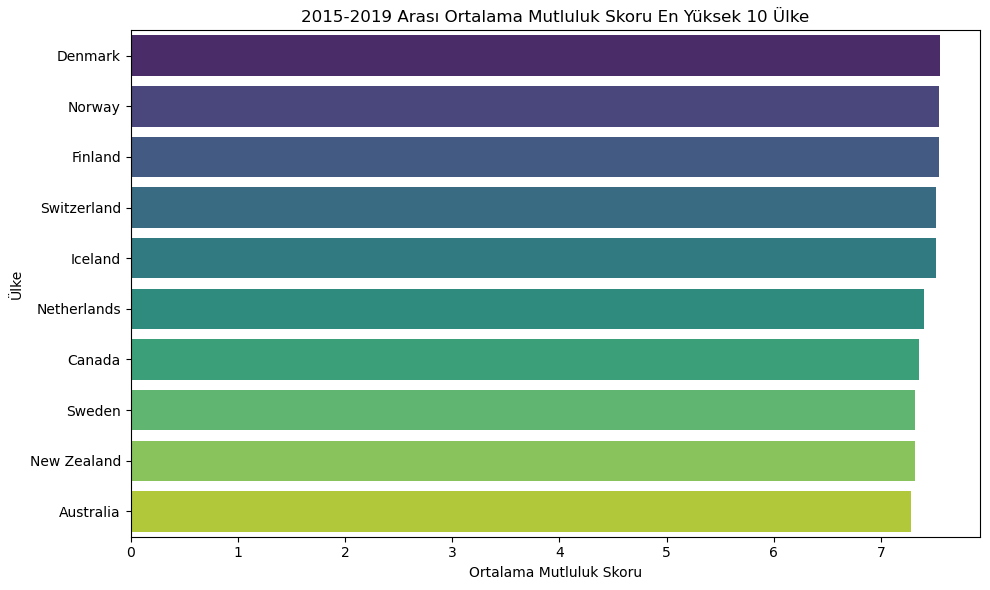

In [22]:
avg_happiness = all_data.groupby('Country')['Happiness Score'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_happiness.values, y=avg_happiness.index, palette='viridis')
plt.title("2015-2019 Arası Ortalama Mutluluk Skoru En Yüksek 10 Ülke")
plt.xlabel("Ortalama Mutluluk Skoru")
plt.ylabel("Ülke")
plt.tight_layout()
plt.show()


In [28]:
pivot_scores = all_data.pivot(index='Country', columns='Year', values='Happiness Score')
pivot_scores['Change_2015_2019'] = pivot_scores[2019] - pivot_scores[2015]

top_increase = pivot_scores['Change_2015_2019'].sort_values(ascending=False).head(10)
top_decrease = pivot_scores['Change_2015_2019'].sort_values().head(10)

/var/folders/1_/5j6c6k0946q4b0h49nnk1qth0000gn/T/ipykernel_44145/3845351048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_increase.values, y=top_increase.index, palette='Greens')


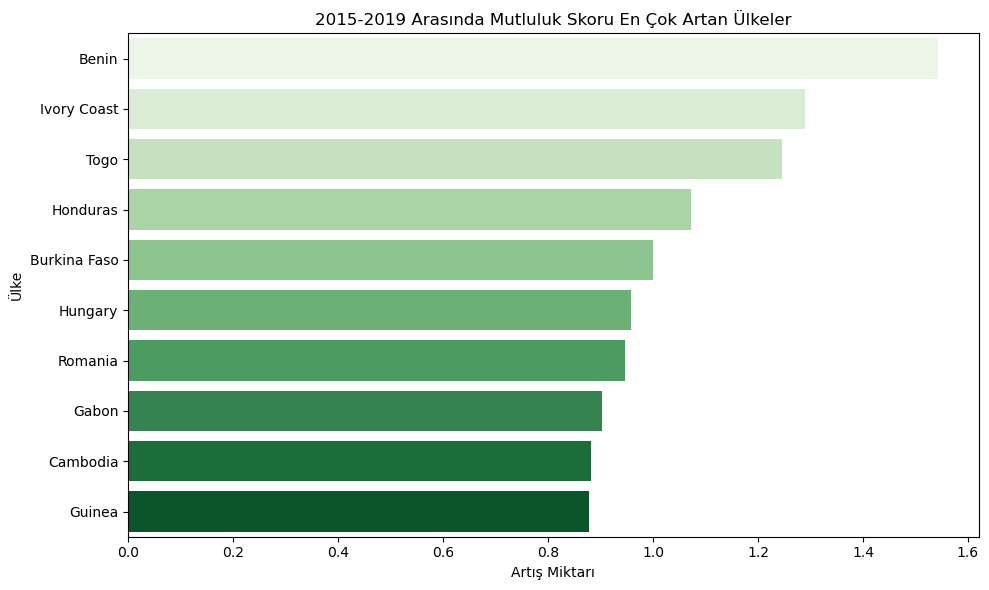

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_increase.values, y=top_increase.index, palette='Greens')
plt.title("2015-2019 Arasında Mutluluk Skoru En Çok Artan Ülkeler")
plt.xlabel("Artış Miktarı")
plt.ylabel("Ülke")
plt.tight_layout()
plt.show()


/var/folders/1_/5j6c6k0946q4b0h49nnk1qth0000gn/T/ipykernel_44145/3325266675.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_decrease.values, y=top_decrease.index, palette='Reds')


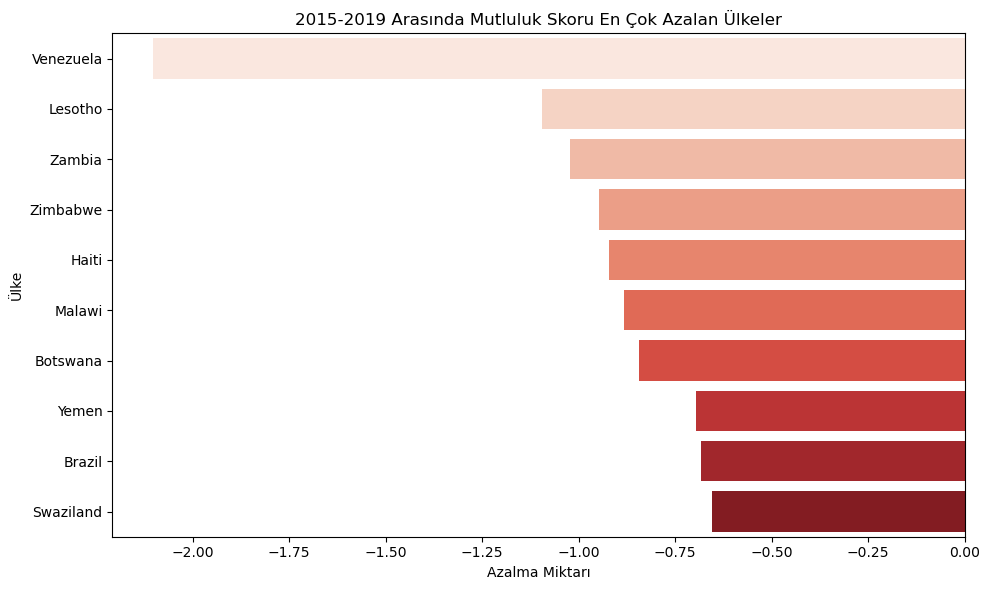

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_decrease.values, y=top_decrease.index, palette='Reds')
plt.title("2015-2019 Arasında Mutluluk Skoru En Çok Azalan Ülkeler")
plt.xlabel("Azalma Miktarı")
plt.ylabel("Ülke")
plt.tight_layout()
plt.show()

/var/folders/1_/5j6c6k0946q4b0h49nnk1qth0000gn/T/ipykernel_44145/3142045199.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.values, y=region_avg.index, palette='Blues_d')


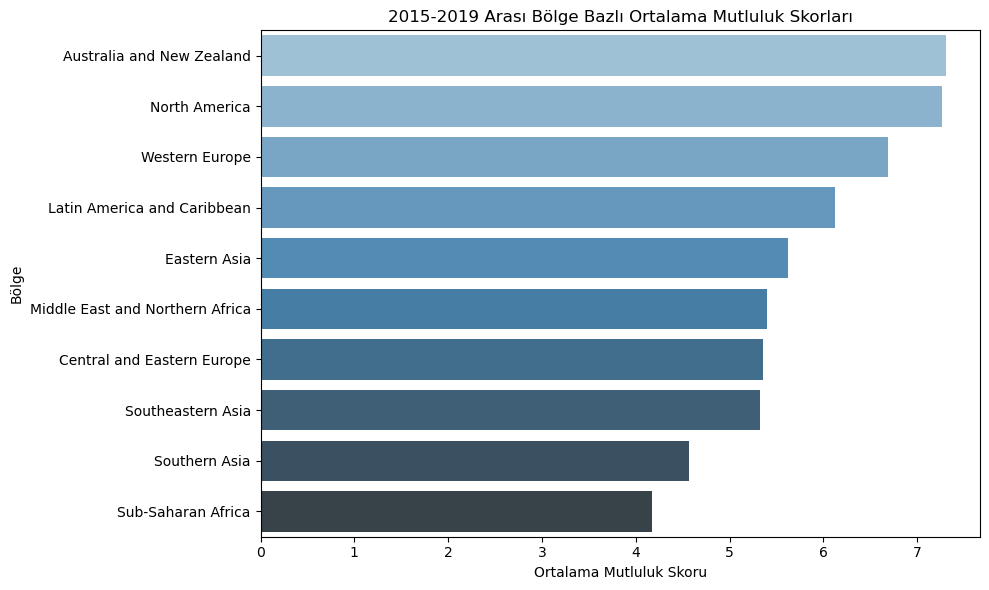

In [34]:
region_avg = all_data.dropna(subset=["Region"]).groupby("Region")["Happiness Score"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=region_avg.values, y=region_avg.index, palette='Blues_d')
plt.title("2015-2019 Arası Bölge Bazlı Ortalama Mutluluk Skorları")
plt.xlabel("Ortalama Mutluluk Skoru")
plt.ylabel("Bölge")
plt.tight_layout()
plt.show()

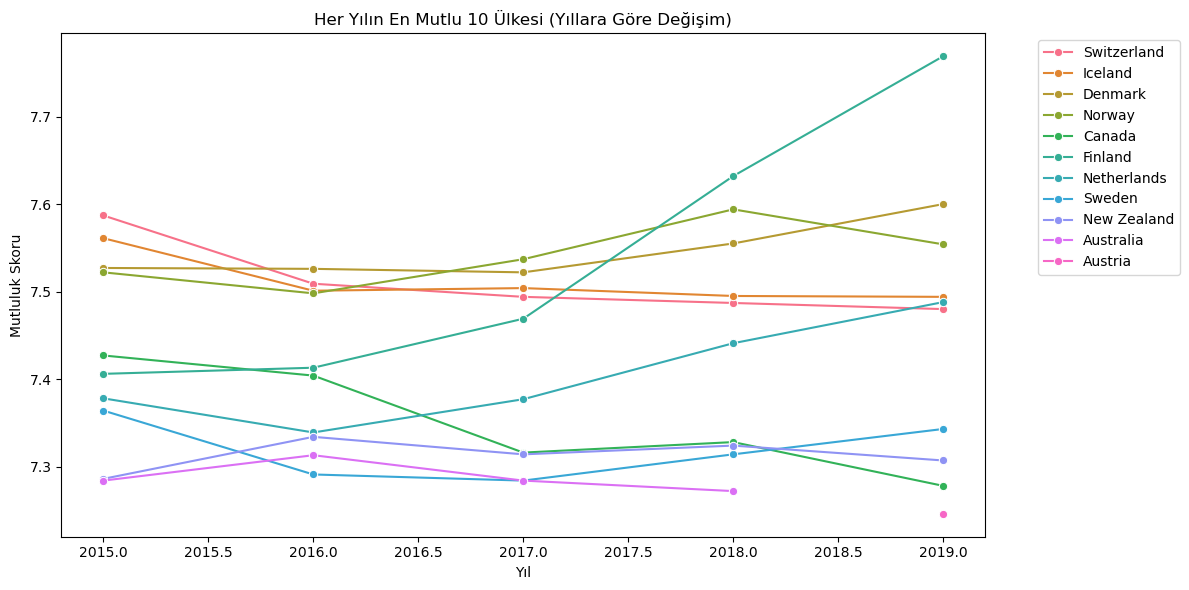

In [36]:
top10_by_year = all_data.sort_values(['Year', 'Happiness Score'], ascending=[True, False]).groupby('Year').head(10)

plt.figure(figsize=(12,6))
sns.lineplot(data=top10_by_year, x="Year", y="Happiness Score", hue="Country", marker="o")
plt.title("Her Yılın En Mutlu 10 Ülkesi (Yıllara Göre Değişim)")
plt.xlabel("Yıl")
plt.ylabel("Mutluluk Skoru")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

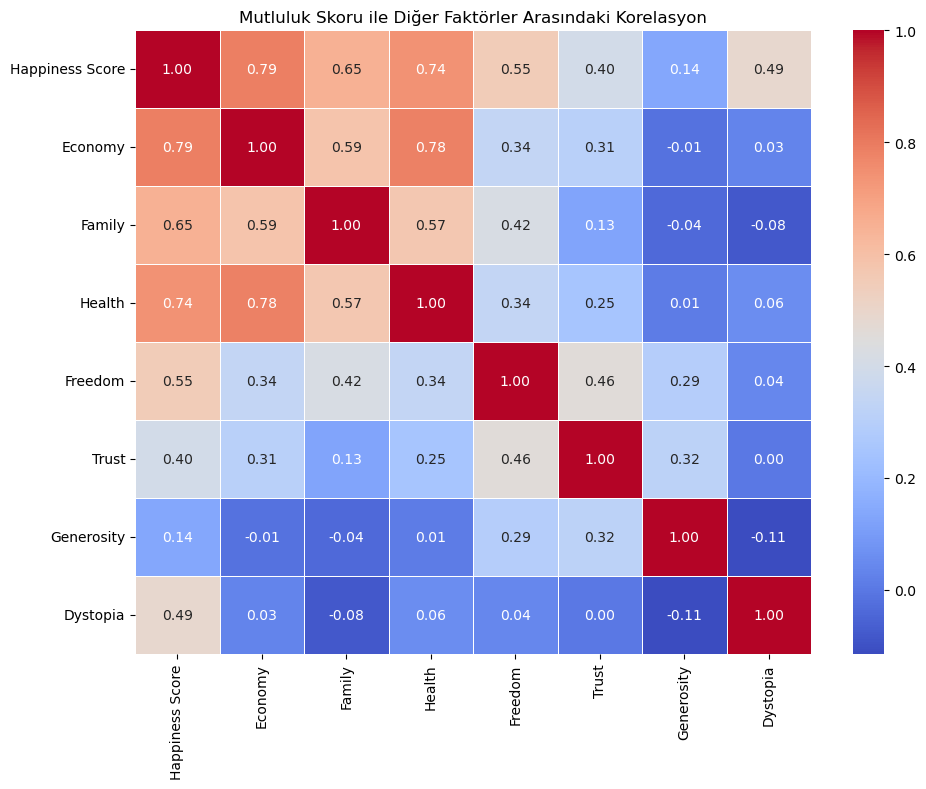

In [38]:
numeric_cols = ['Happiness Score', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia']
corr_matrix = all_data[numeric_cols].corr()

# Korelasyon matrisi çizimi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mutluluk Skoru ile Diğer Faktörler Arasındaki Korelasyon")
plt.tight_layout()
plt.show()